In [1]:
"""
  Only execute the commented code in Google Colaboratory to download the dataset in a zip file
"""
! gdown --id 1-ySD5q7lZwgjsYHdbPgbqM7bff0M5MGB
from zipfile import ZipFile
with ZipFile("/content/EuroSAT_dataset.zip", 'r') as zip:
  zip.extractall("/content/dataset")

Downloading...
From: https://drive.google.com/uc?id=1-ySD5q7lZwgjsYHdbPgbqM7bff0M5MGB
To: /content/EuroSAT_dataset.zip
100% 69.8M/69.8M [00:00<00:00, 190MB/s]


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
import tensorflow.keras

from matplotlib import pyplot as plt
import numpy as np

In [3]:
size = 64
batch_size = 20
base_dir = "/content/dataset/EuroSAT_dataset"

train_data_dir = base_dir
validation_data_dir = train_data_dir
LABELS = ["AnnualCrop", "Forest", "HerbaceousVegetation", "Highway", "Industrial", "Pasture", "PermanentCrop", "Residential", "River", "SeaLake"]

In [4]:
# DATA SOURCE --------------------------------------------------

train_datagen = ImageDataGenerator(
        validation_split = 0.2,
        rescale=1./255,
        rotation_range = 180,
        zoom_range = 0.15,
        horizontal_flip = True
)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(size, size),
        batch_size=batch_size,
        class_mode='categorical',
        subset = "training",
        classes = LABELS,
        seed = 2022
)

validation_datagen = ImageDataGenerator(
        validation_split = 0.2,
        rescale=1./255
)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(size, size),
        batch_size=batch_size,
        class_mode='categorical',
        subset = "validation",
        classes = LABELS,
        seed = 2022
)

Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


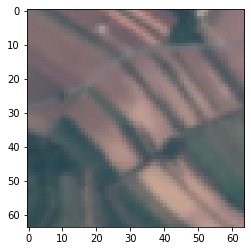

In [5]:
# Visualization of the last image of the first batch
image = np.array(train_generator[0][0][7], dtype='float')
plt.imshow(image)
plt.show()

In [8]:
# MODEL --------------------------------------------------

model = Sequential()

# Convolutional Layers

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(size, size, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(96, (5, 5), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Dense Layers

model.add(Flatten())

model.add(Dense(96, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adadelta(learning_rate=0.5),
              metrics=['accuracy'])

In [9]:
# TRAINING --------------------------------------------------

epochs = 25

early_stop = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=8, restore_best_weights=True)

histogram = model.fit(
        train_generator,
        validation_data = validation_generator,
        epochs=epochs,
        callbacks = [early_stop]
)

Epoch 1/25
800/800 [==============================] - 39s 48ms/step - loss: 1.9630 - accuracy: 0.2129 - val_loss: 1.6596 - val_accuracy: 0.3275
Epoch 2/25
800/800 [==============================] - 39s 48ms/step - loss: 1.5867 - accuracy: 0.3609 - val_loss: 1.2827 - val_accuracy: 0.5450
Epoch 3/25
800/800 [==============================] - 38s 48ms/step - loss: 1.3512 - accuracy: 0.4782 - val_loss: 1.1646 - val_accuracy: 0.5485
Epoch 4/25
800/800 [==============================] - 38s 48ms/step - loss: 1.1699 - accuracy: 0.5829 - val_loss: 0.9827 - val_accuracy: 0.6610
Epoch 5/25
800/800 [==============================] - 38s 48ms/step - loss: 1.0295 - accuracy: 0.6544 - val_loss: 0.7769 - val_accuracy: 0.7402
Epoch 6/25
800/800 [==============================] - 38s 48ms/step - loss: 0.9578 - accuracy: 0.6807 - val_loss: 0.8253 - val_accuracy: 0.7090
Epoch 7/25
800/800 [==============================] - 38s 48ms/step - loss: 0.8703 - accuracy: 0.7077 - val_loss: 0.9239 - val_accuracy:

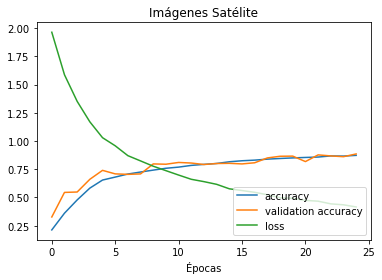

In [10]:
# VISUALIZATION OF TRAINING METRICS --------------------------------------------------

plt.plot(histogram.history['accuracy'], label='accuracy')
plt.plot(histogram.history['val_accuracy'], label='validation accuracy')
plt.plot(histogram.history['loss'], label='loss')

plt.title('Imágenes Satélite')
plt.xlabel('Épocas')
plt.legend(loc="lower right")

plt.show()